<a href="https://colab.research.google.com/github/LokeshPanuganti15/ML/blob/main/ML_EXP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

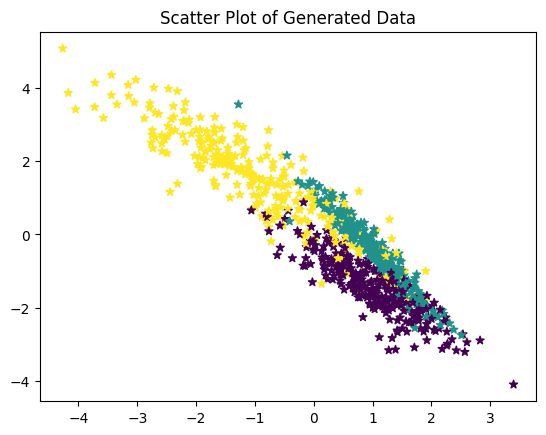

Actual Value: 0
Predicted Value: 0
Accuracy: 0.8484848484848485
F1 Score: 0.8478577273806642


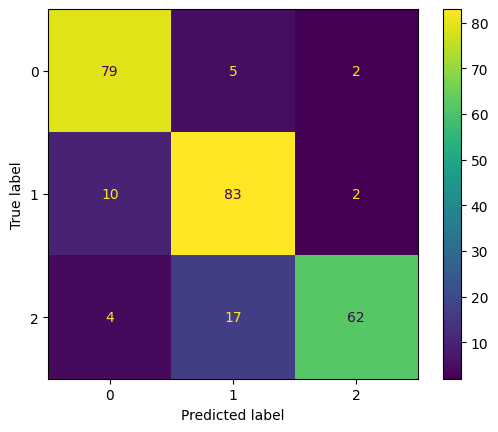

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
X, y = make_classification(
    n_features=6, n_classes=3, n_samples=800,
    n_informative=2, random_state=1, n_clusters_per_class=1
)
plt.scatter(X[:, 0], X[:, 1], c=y, marker="*")
plt.title("Scatter Plot of Generated Data")
plt.show()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)
model = GaussianNB()
model.fit(X_train, y_train)
sample_index = 6
predicted = model.predict([X_test[sample_index]])
print("Actual Value:", list(y_test)[sample_index])
print("Predicted Value:", predicted[0])
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

Accuracy: 0.81

Confusion Matrix:
 [[17 27]
 [ 1 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.39      0.55        44
           1       0.79      0.99      0.88       100

    accuracy                           0.81       144
   macro avg       0.87      0.69      0.71       144
weighted avg       0.83      0.81      0.78       144



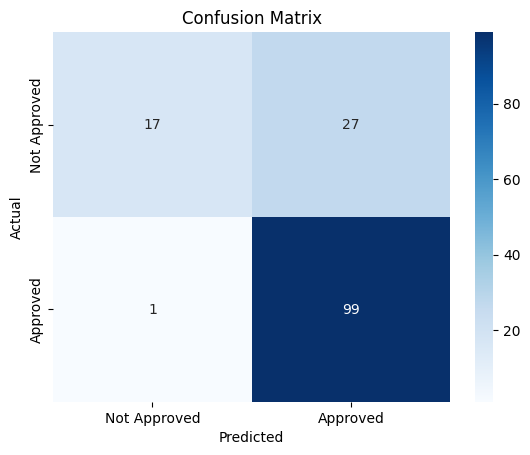

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv(r"/content/loan.csv")
data.drop(columns=['Loan_ID'], inplace=True)
data.dropna(inplace=True)
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(float)
data = pd.get_dummies(data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()